#Descriptive Analysis

##Introduction

The following notebook will address the Exploratory Data Analysis of the dataset. The dataset selected is retrieved from [COVID 19 World vaccination progress](https://www.kaggle.com/gpreda/covid-world-vaccination-progress?select=country_vaccinations.csv) and [Country Statistics - UNData](https://www.kaggle.com/sudalairajkumar/undata-country-profiles/?select=country_profile_variables.csv).
This dataset collects the ongoing vaccinations of 166 different countries, containing valuable information regarding the vaccines being used, the rates at which the shots are given and the population already vaccinated.

The notebook's structure is as follows:

1.   Installations, imports and reading of necessary files.
2.   Exploratory analysis - using *SweetViz* and *pandas_profiling*





## 1. Installations and Imports

If running in Colab, please set **Runtime** to GPU. The next cell checks the Runtime to GPU to smooth the reading of the notebook:

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != "/device:GPU:0":
   raise SystemError("GPU Device not found")
print("Found GPU at: {}".format(device_name))

Found GPU at: /device:GPU:0


In [52]:
!pip install sweetviz
!pip install --upgrade pandas_profiling

Requirement already up-to-date: pandas_profiling in /usr/local/lib/python3.7/dist-packages (2.12.0)


In [3]:
import sweetviz as sv
from pandas_profiling import ProfileReport
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


Reading the files <font color='green'>[Beware of the file path]</font> :

In [7]:
df_vacc = pd.read_excel('drive/MyDrive/country_vaccinations_v02.xltx')
df_vacc["date"] = pd.to_datetime(df_vacc["date"], format = "%Y-%m-%d")
df_UN = pd.read_csv('drive/MyDrive/country_profile_variables.csv')

##2. General Exploratory Analysis

Now that both datasets are uploaded, it is time to explore them and keep the desired attributes.

In [8]:
df_vacc.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...


In [9]:
df_vacc.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
13921,Zimbabwe,ZWE,2021-04-20,325007.0,288229.0,36778.0,8016.0,10950.0,2.19,1.94,0.25,737.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1386047507...
13922,Zimbabwe,ZWE,2021-04-21,332996.0,295631.0,37365.0,7989.0,10124.0,2.24,1.99,0.25,681.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1386047507...
13923,Zimbabwe,ZWE,2021-04-22,351799.0,308071.0,43728.0,18803.0,9417.0,2.37,2.07,0.29,634.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1386047507...
13924,Zimbabwe,ZWE,2021-04-23,365985.0,319732.0,46253.0,14186.0,8755.0,2.46,2.15,0.31,589.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1386047507...
13925,Zimbabwe,ZWE,2021-04-24,372099.0,324488.0,47611.0,6114.0,8600.0,2.50,2.18,0.32,579.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1386047507...


In [10]:
df_UN.sample(10)

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population),Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)","Life expectancy at birth (females/males, years)","Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
80,Gibraltar,SouthernEurope,6,35,3457.1,101.8,-99,-99,-99.0,-99,-99.0,-99.0,-99,-99,-99,-99,.../...,-99,-99,234,533,-299,-99,0.6,100.0,0.1,-99,.../...,18.1/22.4,11.1/34.3,-99,-99,-99.0,-99,-99,-99,-99,-99,-99.0,129.5,65.0,31,0.0,0.5/16.5,-99,259,-99,-99,-99,-99
123,Maldives,SouthernAsia,300,436,1454.4,131.8,3435,2.8,9446.5,3.1,22.0,74.9,7.7,22.8,69.5,2.9,57.8/79.6,65,65,140,2128,-1988,-326,2.8,45.5,4.5,2.2,77.4/75.4,23.4/6.3,94.1/25.9,-99,9.0,13.7,...,5.2,98.6/97.3,.../...,20.3/12.4,5.9,206.7,54.5,75,3.3,1.3/3.7,0,54,99.5/97.9,97.5/98.3,0.95,-99
199,Tajikistan,CentralAsia,142600,8921,63.7,100.9,7853,4.2,925.9,25.0,28.0,47.1,57.2,13.4,29.4,10.8,59.6/77.9,155,172,899,3030,-2132,-472,2.2,26.8,2.6,3.5,73.5/67.7,35.3/5.8,275.1/3.2,21.8,38.9,6.9,1.7,5.2,101.2/99.8,83.1/92.5,24.0/33.6,19.0,98.6,19.0,45,3.0,5.2/0.6,76,14,93.1/66.7,93.8/95.5,4.55,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,10.8,88.6,-99,-99,-99,-99,-99,-99,-99,100,1355,-1255,-99,-1.6,85.1,0.1,1.2,-99,14.4/19.0,42.1/59.7,-99,-99,8.1,3.7,3.3,-99,-99,-99,32.1,88.1,96.9,13,34.0,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99,-99
86,Guatemala,CentralAmerica,108889,16914,157.8,96.9,63794,4.1,3903.5,10.8,27.2,62.0,32.0,18.5,49.4,2.4,41.7/84.0,158,158,10572,16987,-6415,-96,2.1,51.6,3.4,3.2,75.6/69.2,35.1/6.9,76.4/0.5,1.8,26.9,6.2,...,3.0,99.8/103.8,63.3/67.9,23.5/20.2,12.7,111.5,27.1,290,33.4,18.3/1.1,327,32,98.4/86.8,77.5/49.3,0.66,-99
150,Northern Mariana Islands,Micronesia,457,55,119.9,107.1,-99,-99,-99.0,-99,-99.0,-99.0,...,...,...,...,.../...,-99,-99,1735,4553,-2818,-99,0.1,89.2,0.4,1.6,77.9/74.9,23.5/10.0,21.6/39.3,-99,6.4,-99.0,-99,-99,-99,-99,-99,-99.0,...,-99,102,64.5,-99,-99,-99,97.5/97.5,79.7/79.7,-99,-99
116,Libya,NorthernAfrica,1676198,6375,3.6,101.7,34457,-10.2,5488.2,0.9,67.1,32.0,19.1,25.1,55.8,19.2,27.8/78.4,113,114,4615,8876,-4261,-108,0.2,78.6,1.1,2.4,74.4/68.8

### Merging Datasets

In [11]:
df_full = df_vacc.merge(df_UN, on = "country", how = "left") # A left join is used so that countries
                                                             # that don´t match are not problematic
df_full["Region"].dropna(axis = 0) # Drop every country that doesn´t appear in the "merged" dataset
df_full.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population),Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)","Life expectancy at birth (females/males, years)","Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...,SouthernAsia,652864,35530.0,54.4,106.3,20270.0,-2.4,623.2,23.3,23.3,53.3,61.6,10.0,28.5,8.6,19.3/83.6,125.0,125.0,1458,3568,-2110,-5121,3.2,26.7,4.0,5.3,63.5/61.0,43.2/4.1,382.4/1.2,1513.1,68.6,8.2,0.3,3.3,91.1/131.6,39.7/70.7,3.7/13.3,27.7,61.6,8.3,42.0,2.1,9.8/0.3,63.0,5.0,78.2/47.0,45.1/27.0,21.43,-99.0
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...,SouthernAsia,652864,35530.0,54.4,106.3,20270.0,-2.4,623.2,23.3,23.3,53.3,61.6,10.0,28.5,8.6,19.3/83.6,125.0,125.0,1458,3568,-2110,-5121,3.2,26.7,4.0,5.3,63.5/61.0,43.2/4.1,382.4/1.2,1513.1,68.6,8.2,0.3,3.3,91.1/131.6,39.7/70.7,3.7/13.3,27.7,61.6,8.3,42.0,2.1,9.8/0.3,63.0,5.0,78.2/47.0,45.1/27.0,21.43,-99.0
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...,SouthernAsia,652864,35530.0,54.4,106.3,20270.0,-2.4,623.2,23.3,23.3,53.3,61.6,10.0,28.5,8.6,19.3/83.6,125.0,125.0,1458,3568,-2110,-5121,3.2,26.7,4.0,5.3,63.5/61.0,43.2/4.1,382.4/1.2,1513.1,68.6,8.2,0.3,3.3,91.1/131.6,39.7/70.7,3.7/13.3,27.7,61.6,8.3,42.0,2.1,9.8/0.3,63.0,5.0,78.2/47.0,45.1/27.0,21.43,-99.0
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...,SouthernAsia,652864,355

In [12]:
df_full.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population),Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)","Life expectancy at birth (females/males, years)","Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
13921,Zimbabwe,ZWE,2021-04-20,325007.0,288229.0,36778.0,8016.0,10950.0,2.19,1.94,0.25,737.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1386047507...,EasternAfrica,390757,16530.0,42.7,95.0,13893.0,1.1,890.4,13.0,30.5,56.5,67.5,7.3,25.2,5.0,78.0/87.5,99.0,98.0,2832,5212,-2379,-1521,2.3,32.4,2.3,4.0,59.0/56.1,41.2/4.2,398.9/2.6,308.6,46.5,6.0,0.1,8.4,99.1/100.8,47.1/48.1,8.0/8.9,32.6,84.8,16.4,89.0,37.2,12.0/0.8,482.0,30.0,97.0/67.3,49.3/30.8,6.00,-99.0
13922,Zimbabwe,ZWE,2021-04-21,332996.0,295631.0,37365.0,7989.0,10124.0,2.24,1.99,0.25,681.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1386047507...,EasternAfrica,390757,16530.0,42.7,95.0,13893.0,1.1,890.4,13.0,30.5,56.5,67.5,7.3,25.2,5.0,78.0/87.5,99.0,98.0,2832,5212,-2379,-1521,2.3,32.4,2.3,4.0,59.0/56.1,41.2/4.2,398.9/2.6,308.6,46.5,6.0,0.1,8.4,99.1/100.8,47.1/48.1,8.0/8.9,32.6,84.8,16.4,89.0,37.2,12.0/0.8,482.0,30.0,97.0/67.3,49.3/30.8,6.00,-99.0
13923,Zimbabwe,ZWE,2021-04-22,351799.0,308071.0,43728.0,18803.0,9417.0,2.37,2.07,0.29,634.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1386047507...,EasternAfrica,390757,16530.0,42.7,95.0,13893.0,1.1,890.4,13.0,30.5,56.5,67.5,7.3,25.2,5.0,78.0/87.5,99.0,98.0,2832,5212,-2379,-1521,2.3,32.4,2.3,4.0,59.0/56.1,41.2/4.2,398.9/2.6,308.6,46.5,6.0,0.1,8.4,99.1/100.8,47.1/48.1,8.0/8.9,32.6,84.8,16.4,89.0,37.2,12.0/0.8,482.0,30.0,97.0/67.3,49.3/30.8,6.00,-99.0
13924,Zimbabwe,ZWE,2021-04-23,365985.0,319732.0,46253.0,14186.0,8755.0,2.46,2.15,0.31,589.0,Sinopharm/Beijing,Ministry of Health,https://twitter

### Cleaning Final Dataset

Having the desired *Prediction Model* in mind, the datasets are striped so that only the necessary columns remain: 

In [13]:
print(df_full.columns.values)

['country' 'iso_code' 'date' 'total_vaccinations' 'people_vaccinated'
 'people_fully_vaccinated' 'daily_vaccinations_raw' 'daily_vaccinations'
 'total_vaccinations_per_hundred' 'people_vaccinated_per_hundred'
 'people_fully_vaccinated_per_hundred' 'daily_vaccinations_per_million'
 'vaccines' 'source_name' 'source_website' 'Region' 'Surface area (km2)'
 'Population in thousands (2017)' 'Population density (per km2, 2017)'
 'Sex ratio (m per 100 f, 2017)'
 'GDP: Gross domestic product (million current US$)'
 'GDP growth rate (annual %, const. 2005 prices)'
 'GDP per capita (current US$)' 'Economy: Agriculture (% of GVA)'
 'Economy: Industry (% of GVA)'
 'Economy: Services and other activity (% of GVA)'
 'Employment: Agriculture (% of employed)'
 'Employment: Industry (% of employed)'
 'Employment: Services (% of employed)' 'Unemployment (% of labour force)'
 'Labour force participation (female/male pop. %)'
 'Agricultural production index (2004-2006=100)'
 'Food production index (2004-20

In [14]:
df = df_full[['country', 'date', 'total_vaccinations', 'people_vaccinated',
 'people_fully_vaccinated', 'daily_vaccinations', 'Region', 'Population in thousands (2017)', 
 'GDP: Gross domestic product (million current US$)',
 'GDP per capita (current US$)', 'Health: Total expenditure (% of GDP)', 'Population age distribution (0-14 / 60+ years, %)']]
df.head()

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,Region,Population in thousands (2017),GDP: Gross domestic product (million current US$),GDP per capita (current US$),Health: Total expenditure (% of GDP),"Population age distribution (0-14 / 60+ years, %)"
0,Afghanistan,2021-02-22,0.0,0.0,NaN,NaN,SouthernAsia,35530.0,20270.0,623.2,8.2,43.2/4.1
1,Afghanistan,2021-02-23,NaN,NaN,NaN,1367.0,SouthernAsia,35530.0,20270.0,623.2,8.2,43.2/4.1
2,Afghanistan,2021-02-24,NaN,NaN,NaN,1367.0,SouthernAsia,35530.0,20270.0,623.2,8.2,43.2/4.1
3,Afghanistan,2021-02-25,NaN,NaN,NaN,1367.0,SouthernAsia,35530.0,20270.0,623.2,8.2,43.2/4.1
4,Afghanistan,2021-02-26,NaN,NaN,NaN,1367.0,SouthernAsia,35530.0,20270.0,623.2,8.2,43.2/4.1


With a small inspiration taken from [here](https://stackoverflow.com/questions/37333299/splitting-a-pandas-dataframe-column-by-delimiter), the datasets are cleaned and ready for further exploration:

In [15]:
df["population"] = df["Population in thousands (2017)"] * 1000
df[['children %','3rd Age %']] = df['Population age distribution (0-14 / 60+ years, %)'].str.split('/',expand=True)
df['children %'] = pd.to_numeric(df['children %'], downcast='float', errors='coerce')
df['3rd Age %'] = pd.to_numeric(df['3rd Age %'], downcast='float', errors='coerce')
df.drop(["Population in thousands (2017)", 'Population age distribution (0-14 / 60+ years, %)'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13926 entries, 0 to 13925
Data columns (total 13 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   country                                            13926 non-null  object        
 1   date                                               13926 non-null  datetime64[ns]
 2   total_vaccinations                                 8267 non-null   float64       
 3   people_vaccinated                                  7553 non-null   float64       
 4   people_fully_vaccinated                            5515 non-null   float64       
 5   daily_vaccinations                                 13714 non-null  float64       
 6   Region                                             11919 non-null  object        
 7   GDP: Gross domestic product (million current US$)  11919 non-null  float64       
 8   GDP per capita (

### Temporal analysis

In [16]:
df["Week"]= df['date'].dt.week
df['people_fully_vaccinated'] = df['people_fully_vaccinated'].fillna(0)
df['daily_vaccinations'] = df['daily_vaccinations'].fillna(0)
#df.drop('date', axis='columns', inplace=True)
df.head()

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,Region,GDP: Gross domestic product (million current US$),GDP per capita (current US$),Health: Total expenditure (% of GDP),population,children %,3rd Age %,Week
0,Afghanistan,2021-02-22,0.0,0.0,0.0,0.0,SouthernAsia,20270.0,623.2,8.2,35530000.0,43.200001,4.1,8
1,Afghanistan,2021-02-23,NaN,NaN,0.0,1367.0,SouthernAsia,20270.0,623.2,8.2,35530000.0,43.200001,4.1,8
2,Afghanistan,2021-02-24,NaN,NaN,0.0,1367.0,SouthernAsia,20270.0,623.2,8.2,35530000.0,43.200001,4.1,8
3,Afghanistan,2021-02-25,NaN,NaN,0.0,1367.0,SouthernAsia,20270.0,623.2,8.2,35530000.0,43.200001,4.1,8
4,Afghanistan,2021-02-26,NaN,NaN,0.0,1367.0,SouthernAsia,20270.0,623.2,8.2,35530000.0,43.200001,4.1,8


In [17]:
df1 = df.groupby(["Week", "country"]).max()
column= df.groupby(["Week", "country"]).sum()
df1["week_vaccinations"]= column["daily_vaccinations"]
#df1.drop('daily_vaccinations', axis='columns', inplace=True)
df1.head()

date  total_vaccinations  ...  3rd Age %  week_vaccinations
Week country                                   ...                              
1    Albania   2021-01-10                 0.0  ...  19.000000                0.0
     Argentina 2021-01-10            107542.0  ...  15.400000            66829.0
     Austria   2021-01-10             30556.0  ...  25.100000            11835.0
     Bahrain   2021-01-10             89250.0  ...   4.600000            15824.0
     Belarus   2021-01-10                 NaN  ...  21.299999             2821.0

[5 rows x 13 columns]

In [18]:
df3= df1.week_vaccinations.unstack(level=-1)
df3.head()

country,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,Chile,China,Colombia,Congo,Costa Rica,Cote d'Ivoire,Croatia,...,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Thailand,Timor,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turks and Caicos Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Wales,Zambia,Zimbabwe
Week,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,66829.0,NaN,NaN,NaN,11835.0,NaN,NaN,15824.0,NaN,NaN,2821.0,13987.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,6216.0,NaN,NaN,133435.0,NaN,1925.0,1787.0,3196428.0,NaN,NaN,6857.0,NaN,12533.0,...,NaN,2300.0,500.0,NaN,NaN,22152.0,13463.0,NaN,NaN,NaN,NaN,NaN,286363.0,NaN,NaN,NaN,25769.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,169681.0,1275540.0,2852361.0,NaN,NaN,NaN,NaN,35336.0,NaN,NaN
2,NaN,439.0,NaN,NaN,NaN,NaN,NaN,94399.0,NaN,NaN,NaN,63398.0,0.0,NaN,39576.0,NaN,NaN,2821.0,72309.0,NaN,1932.0,NaN,NaN,NaN,NaN,112.0,NaN,7026.0,NaN,NaN,239389.0,NaN,1925.0,6447.0,2948979.0,NaN,NaN,13832.0,NaN,17660.0,...,NaN,14885.0,4885.0,NaN,25959.0,38588.0,17611.0,NaN,NaN,NaN,NaN,NaN,431859.0,NaN,NaN,NaN,59404.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,990025.0,2184.0,NaN,NaN,621965.0,1555364.0,5165862.0,NaN,NaN,NaN,NaN,52282.0,NaN,NaN
3,NaN,274.0,NaN,NaN,NaN,NaN,NaN,80229.0,NaN,NaN,NaN,101198.0,22750.0,NaN,53622.0,NaN,NaN,2821.0,113292.0,NaN,1488.0,NaN,NaN,NaN,NaN,242995.0,NaN,7147.0,NaN,NaN,264251.0,NaN,1925.0,41494.0,5365714.0,NaN,NaN,14998.0,NaN,21509.0,...,NaN,80874.0,10908.0,NaN,39532.0,40716.0,16768.0,NaN,NaN,NaN,NaN,NaN,430073.0,NaN,NaN,NaN,97472.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,834498.0,2184.0,NaN,NaN,712249.0,2210181.0,6710512.0,NaN,NaN,NaN,NaN,93800.0,NaN,NaN
4,NaN,28.0,1919.0,396.0,NaN,NaN,NaN,69275.0,NaN,NaN,NaN,56606.0,22750.0,NaN,53984.0,5139.0,NaN,2821.0,103538.0,NaN,1796.0,NaN,54.0,NaN,NaN,1187080.0,NaN,11403.0,NaN,NaN,180668.0,NaN,1925.0,8949.0,6452846.0,NaN,NaN,14812.0,NaN,16277.0,...,NaN,279737.0,12943.0,NaN,66642.0,41928.0,16205.0,NaN,NaN,NaN,NaN,NaN,373113.0,43916.0,NaN,NaN,98770.0,108213.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,597013.0,2184.0,NaN,NaN,662717.0,2589620.0,8511869.0,NaN,NaN,NaN,NaN,140538.0,NaN,NaN
5,NaN,177.0,22175.0,348.0,NaN,447.0,NaN,101005.0,NaN,NaN,NaN,75934.0,23704.0,NaN,53984.0,19336.0,NaN,2821.0,117157.0,NaN,3472.0,NaN,4252.0,NaN,NaN,1452288.0,NaN,16312.0,NaN,NaN,115344.0,NaN,2135.0,315515.0,9658647.0,NaN,NaN,12933.0,NaN,15565.0,...,NaN,138914.0,10082.0,NaN,75733.0,61395.0,18269.0,NaN,NaN,NaN,NaN,NaN,468480.0,145574.0,NaN,NaN,94466.0,110975.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,739000.0,2184.0,NaN,NaN,961837.0,3005242.0,9349417.0,NaN,NaN,NaN,NaN,168019.0,NaN,NaN


In [19]:
df3.head(20)

country,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,Chile,China,Colombia,Congo,Costa Rica,Cote d'Ivoire,Croatia,...,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Thailand,Timor,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turks and Caicos Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Wales,Zambia,Zimbabwe
Week,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,66829.0,NaN,NaN,NaN,11835.0,NaN,NaN,15824.0,NaN,NaN,2821.0,13987.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,6216.0,NaN,NaN,133435.0,NaN,1925.0,1787.0,3196428.0,NaN,NaN,6857.0,NaN,12533.0,...,NaN,2300.0,500.0,NaN,NaN,22152.0,13463.0,NaN,NaN,NaN,NaN,NaN,286363.0,NaN,NaN,NaN,25769.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,169681.0,1275540.0,2852361.0,NaN,NaN,NaN,NaN,35336.0,NaN,NaN
2,NaN,439.0,NaN,NaN,NaN,NaN,NaN,94399.0,NaN,NaN,NaN,63398.0,0.0,NaN,39576.0,NaN,NaN,2821.0,72309.0,NaN,1932.0,NaN,NaN,NaN,NaN,112.0,NaN,7026.0,NaN,NaN,239389.0,NaN,1925.0,6447.0,2948979.0,NaN,NaN,13832.0,NaN,17660.0,...,NaN,14885.0,4885.0,NaN,25959.0,38588.0,17611.0,NaN,NaN,NaN,NaN,NaN,431859.0,NaN,NaN,NaN,59404.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,990025.0,2184.0,NaN,NaN,621965.0,1555364.0,5165862.0,NaN,NaN,NaN,NaN,52282.0,NaN,NaN
3,NaN,274.0,NaN,NaN,NaN,NaN,NaN,80229.0,NaN,NaN,NaN,101198.0,22750.0,NaN,53622.0,NaN,NaN,2821.0,113292.0,NaN,1488.0,NaN,NaN,NaN,NaN,242995.0,NaN,7147.0,NaN,NaN,264251.0,NaN,1925.0,41494.0,5365714.0,NaN,NaN,14998.0,NaN,21509.0,...,NaN,80874.0,10908.0,NaN,39532.0,40716.0,16768.0,NaN,NaN,NaN,NaN,NaN,430073.0,NaN,NaN,NaN,97472.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,834498.0,2184.0,NaN,NaN,712249.0,2210181.0,6710512.0,NaN,NaN,NaN,NaN,93800.0,NaN,NaN
4,NaN,28.0,1919.0,396.0,NaN,NaN,NaN,69275.0,NaN,NaN,NaN,56606.0,22750.0,NaN,53984.0,5139.0,NaN,2821.0,103538.0,NaN,1796.0,NaN,54.0,NaN,NaN,1187080.0,NaN,11403.0,NaN,NaN,180668.0,NaN,1925.0,8949.0,6452846.0,NaN,NaN,14812.0,NaN,16277.0,...,NaN,279737.0,12943.0,NaN,66642.0,41928.0,16205.0,NaN,NaN,NaN,NaN,NaN,373113.0,43916.0,NaN,NaN,98770.0,108213.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,597013.0,2184.0,NaN,NaN,662717.0,2589620.0,8511869.0,NaN,NaN,NaN,NaN,140538.0,NaN,NaN
5,NaN,177.0,22175.0,348.0,NaN,447.0,NaN,101005.0,NaN,NaN,NaN,75934.0,23704.0,NaN,53984.0,19336.0,NaN,2821.0,117157.0,NaN,3472.0,NaN,4252.0,NaN,NaN,1452288.0,NaN,16312.0,NaN,NaN,115344.0,NaN,2135.0,315515.0,9658647.0,NaN,NaN,12933.0,NaN,15565.0,...,NaN,138914.0,10082.0,NaN,75733.0,61395.0,18269.0,NaN,NaN,NaN,NaN,NaN,468480.0,145574.0,NaN,NaN,94466.0,110975.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,739000.0,2184.0,NaN,NaN,961837.0,3005242.0,9349417.0,NaN,NaN,NaN,NaN,168019.0,NaN,NaN
6,NaN,542.0,26236.0,355.0,NaN,1225.0,NaN,129657.0,NaN,NaN,NaN,108943.0,55189.0,NaN,53984.0,455088.0,NaN,2821.0,141290.0,NaN,3231.0,NaN,5848.0,789.0,NaN,1567086.0,NaN,17199.0,4084.0,NaN,163465.0,NaN,3487.0,1160983.0,9261003.0,NaN,NaN,19307.0,NaN,17936.0,...,NaN,237312.0,12667.0,NaN,71318.0,72055.0,19999.0,NaN,NaN,NaN,NaN,NaN,457248.0,39026.0,NaN,NaN,108087.0,113452.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,713695.0,2184.0,NaN,NaN,901474.0,3057994.0,11081072.0,NaN,NaN,NaN,NaN,191431.0,NaN,NaN
7,NaN,2019.0,18740.0,580.0,NaN,1926.0,4475.0,89210.0,NaN,NaN,0.0,101970.0,69503.0,NaN,53984.0,1261644.0,13598.0,2865.0,124916.0,NaN,3751.0,NaN,3722.0,1841.0,NaN,1754581.0,NaN,26168.0,2798.0,NaN,188298.0,NaN,2533.0,1123824.0,4552732.0,41554.0,NaN,14292.0,NaN,30684.0,...,NaN,369396.0,12263.0,NaN,91163.0,78535.0,23967.0,NaN,NaN,10117.0,NaN,NaN,494305.0,69488.0,NaN,NaN,134657.0,131403.0,NaN,NaN,N

In [20]:
df3=df3.fillna(0)
df3.head()

country,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,Chile,China,Colombia,Congo,Costa Rica,Cote d'Ivoire,Croatia,...,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Thailand,Timor,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turks and Caicos Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Wales,Zambia,Zimbabwe
Week,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66829.0,0.0,0.0,0.0,11835.0,0.0,0.0,15824.0,0.0,0.0,2821.0,13987.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6216.0,0.0,0.0,133435.0,0.0,1925.0,1787.0,3196428.0,0.0,0.0,6857.0,0.0,12533.0,...,0.0,2300.0,500.0,0.0,0.0,22152.0,13463.0,0.0,0.0,0.0,0.0,0.0,286363.0,0.0,0.0,0.0,25769.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,169681.0,1275540.0,2852361.0,0.0,0.0,0.0,0.0,35336.0,0.0,0.0
2,0.0,439.0,0.0,0.0,0.0,0.0,0.0,94399.0,0.0,0.0,0.0,63398.0,0.0,0.0,39576.0,0.0,0.0,2821.0,72309.0,0.0,1932.0,0.0,0.0,0.0,0.0,112.0,0.0,7026.0,0.0,0.0,239389.0,0.0,1925.0,6447.0,2948979.0,0.0,0.0,13832.0,0.0,17660.0,...,0.0,14885.0,4885.0,0.0,25959.0,38588.0,17611.0,0.0,0.0,0.0,0.0,0.0,431859.0,0.0,0.0,0.0,59404.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,990025.0,2184.0,0.0,0.0,621965.0,1555364.0,5165862.0,0.0,0.0,0.0,0.0,52282.0,0.0,0.0
3,0.0,274.0,0.0,0.0,0.0,0.0,0.0,80229.0,0.0,0.0,0.0,101198.0,22750.0,0.0,53622.0,0.0,0.0,2821.0,113292.0,0.0,1488.0,0.0,0.0,0.0,0.0,242995.0,0.0,7147.0,0.0,0.0,264251.0,0.0,1925.0,41494.0,5365714.0,0.0,0.0,14998.0,0.0,21509.0,...,0.0,80874.0,10908.0,0.0,39532.0,40716.0,16768.0,0.0,0.0,0.0,0.0,0.0,430073.0,0.0,0.0,0.0,97472.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,834498.0,2184.0,0.0,0.0,712249.0,2210181.0,6710512.0,0.0,0.0,0.0,0.0,93800.0,0.0,0.0
4,0.0,28.0,1919.0,396.0,0.0,0.0,0.0,69275.0,0.0,0.0,0.0,56606.0,22750.0,0.0,53984.0,5139.0,0.0,2821.0,103538.0,0.0,1796.0,0.0,54.0,0.0,0.0,1187080.0,0.0,11403.0,0.0,0.0,180668.0,0.0,1925.0,8949.0,6452846.0,0.0,0.0,14812.0,0.0,16277.0,...,0.0,279737.0,12943.0,0.0,66642.0,41928.0,16205.0,0.0,0.0,0.0,0.0,0.0,373113.0,43916.0,0.0,0.0,98770.0,108213.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,597013.0,2184.0,0.0,0.0,662717.0,2589620.0,8511869.0,0.0,0.0,0.0,0.0,140538.0,0.0,0.0
5,0.0,177.0,22175.0,348.0,0.0,447.0,0.0,101005.0,0.0,0.0,0.0,75934.0,23704.0,0.0,53984.0,19336.0,0.0,2821.0,117157.0,0.0,3472.0,0.0,4252.0,0.0,0.0,1452288.0,0.0,16312.0,0.0,0.0,115344.0,0.0,2135.0,315515.0,9658647.0,0.0,0.0,12933.0,0.0,15565.0,...,0.0,138914.0,10082.0,0.0,75733.0,61395.0,18269.0,0.0,0.0,0.0,0.0,0.0,468480.0,145574.0,0.0,0.0,94466.0,110975.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,739000.0,2184.0,0.0,0.0,961837.0,3005242.0,9349417.0,0.0,0.0,0.0,0.0,168019.0,0.0,0.0


In [21]:
new_index=[51, 52, 53, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
df4= df3.reindex(new_index)
df4 = df4.rename(index={53: -1, 52: -2, 51: -3})
df4.head()

country,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,Chile,China,Colombia,Congo,Costa Rica,Cote d'Ivoire,Croatia,...,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Thailand,Timor,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turks and Caicos Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Wales,Zambia,Zimbabwe
Week,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11918.0,0.0,0.0,0.0,937500.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24754.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32471.0,0.0,275.0,11480.0,1312500.0,0.0,0.0,720.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1184961.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58558.0,0.0,0.0,0.0,7438.0,0.0,0.0,13392.0,0.0,0.0,2418.0,710.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6847.0,0.0,0.0,52021.0,0.0,1925.0,6788.0,1580358.0,0.0,0.0,1680.0,0.0,4420.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8093.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13461.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66829.0,0.0,0.0,0.0,11835.0,0.0,0.0,15824.0,0.0,0.0,2821.0,13987.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6216.0,0.0,0.0,133435.0,0.0,1925.0,1787.0,3196428.0,0.0,0.0,6857.0,0.0,12533.0,...,0.0,2300.0,500.0,0.0,0.0,22152.0,13463.0,0.0,0.0,0.0,0.0,0.0,286363.0,0.0,0.0,0.0,25769.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,169681.0,1275540.0,2852361.0,0.0,0.0,0.0,0.0,35336.0,0.0,0.0
2,0.0,439.0,0.0,0.0,0.0,0.0,0.0,94399.0,0.0,0.0,0.0,63398.0,0.0,0.0,39576.0,0.0,0.0,2821.0,72309.0,0.0,1932.0,0.0,0.0,0.0,0.0,112.0,0.0,7026.0,0.0,0.0,239389.0,0.0,1925.0,6447.0,2948979.0,0.0,0.0,13832.0,0.0,17660.0,...,0.0,14885.0,4885.0,0.0,25959.0,38588.0,17611.0,0.0,0.0,0.0,0.0,0.0,431859.0,0.0,0.0,0.0,59404.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,990025.0,2184.0,0.0,0.0,621965.0,1555364.0,5165862.0,0.0,0.0,0.0,0.0,52282.0,0.0,0.0


In [22]:
df4.head(20)

country,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,Chile,China,Colombia,Congo,Costa Rica,Cote d'Ivoire,Croatia,...,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Thailand,Timor,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turks and Caicos Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Wales,Zambia,Zimbabwe
Week,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11918.0,0.0,0.0,0.0,937500.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24754.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32471.0,0.0,275.0,11480.0,1312500.0,0.0,0.0,720.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1184961.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58558.0,0.0,0.0,0.0,7438.0,0.0,0.0,13392.0,0.0,0.0,2418.0,710.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6847.0,0.0,0.0,52021.0,0.0,1925.0,6788.0,1580358.0,0.0,0.0,1680.0,0.0,4420.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8093.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13461.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66829.0,0.0,0.0,0.0,11835.0,0.0,0.0,15824.0,0.0,0.0,2821.0,13987.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6216.0,0.0,0.0,133435.0,0.0,1925.0,1787.0,3196428.0,0.0,0.0,6857.0,0.0,12533.0,...,0.0,2300.0,500.0,0.0,0.0,22152.0,13463.0,0.0,0.0,0.0,0.0,0.0,286363.0,0.0,0.0,0.0,25769.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,169681.0,1275540.0,2852361.0,0.0,0.0,0.0,0.0,35336.0,0.0,0.0
2,0.0,439.0,0.0,0.0,0.0,0.0,0.0,94399.0,0.0,0.0,0.0,63398.0,0.0,0.0,39576.0,0.0,0.0,2821.0,72309.0,0.0,1932.0,0.0,0.0,0.0,0.0,112.0,0.0,7026.0,0.0,0.0,239389.0,0.0,1925.0,6447.0,2948979.0,0.0,0.0,13832.0,0.0,17660.0,...,0.0,14885.0,4885.0,0.0,25959.0,38588.0,17611.0,0.0,0.0,0.0,0.0,0.0,431859.0,0.0,0.0,0.0,59404.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,990025.0,2184.0,0.0,0.0,621965.0,1555364.0,5165862.0,0.0,0.0,0.0,0.0,52282.0,0.0,0.0
3,0.0,274.0,0.0,0.0,0.0,0.0,0.0,80229.0,0.0,0.0,0.0,101198.0,22750.0,0.0,53622.0,0.0,0.0,2821.0,113292.0,0.0,1488.0,0.0,0.0,0.0,0.0,242995.0,0.0,7147.0,0.0,0.0,264251.0,0.0,1925.0,41494.0,5365714.0,0.0,0.0,14998.0,0.0,21509.0,...,0.0,80874.0,10908.0,0.0,39532.0,40716.0,16768.0,0.0,0.0,0.0,0.0,0.0,430073.0,0.0,0.0,0.0,97472.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,834498.0,2184.0,0.0,0.0,712249.0,2210181.0,6710512.0,0.0,0.0,0.0,0.0,93800.0,0.0,0.0
4,0.0,28.0,1919.0,396.0,0.0,0.0,0.0,69275.0,0.0,0.0,0.0,56606.0,22750.0,0.0,53984.0,5139.0,0.0,2821.0,103538.0,0.0,1796.0,0.0,54.0,0.0,0.0,1187080.0,0.0,11403.0,0.0,0.0,180668.0,0.0,1925.0,8949.0,6452846.0,0.0,0.0,14812.0,0.0,16277.0,...,0.0,279737.0,12943.0,0.0,66642.0,41928.0,16205.0,0.0,0.0,0.0,0.0,0.0,373113.0,43916.0,0.0,0.0,98770.0,108213.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,597013.0,2184.0,0.0,0.0,662717.0,2589620.0,8511869.0,0.0,0.0,0.0,0.0,140538.0,0.0,0.0
5,0.0,177.0,22175.0,348.0,0.0,447.0,0.0,101005.0,0.0,0.0,0.0,75934.0,23704.0,0.0,53984.0,19336.0,0.0,2821.0,117157.0,0.0,3472.0,0.0,4252.0,0.0,0.0,1452288.0,0.0,16312.0,0.0,0.0,115344.0,0.0,2135.0,315515.0,9658647.0,0.0,0.0,12933.0,0.0,15565.0,...,0.0,138914.0,10082.0,0.0,75733.0,61395.0,

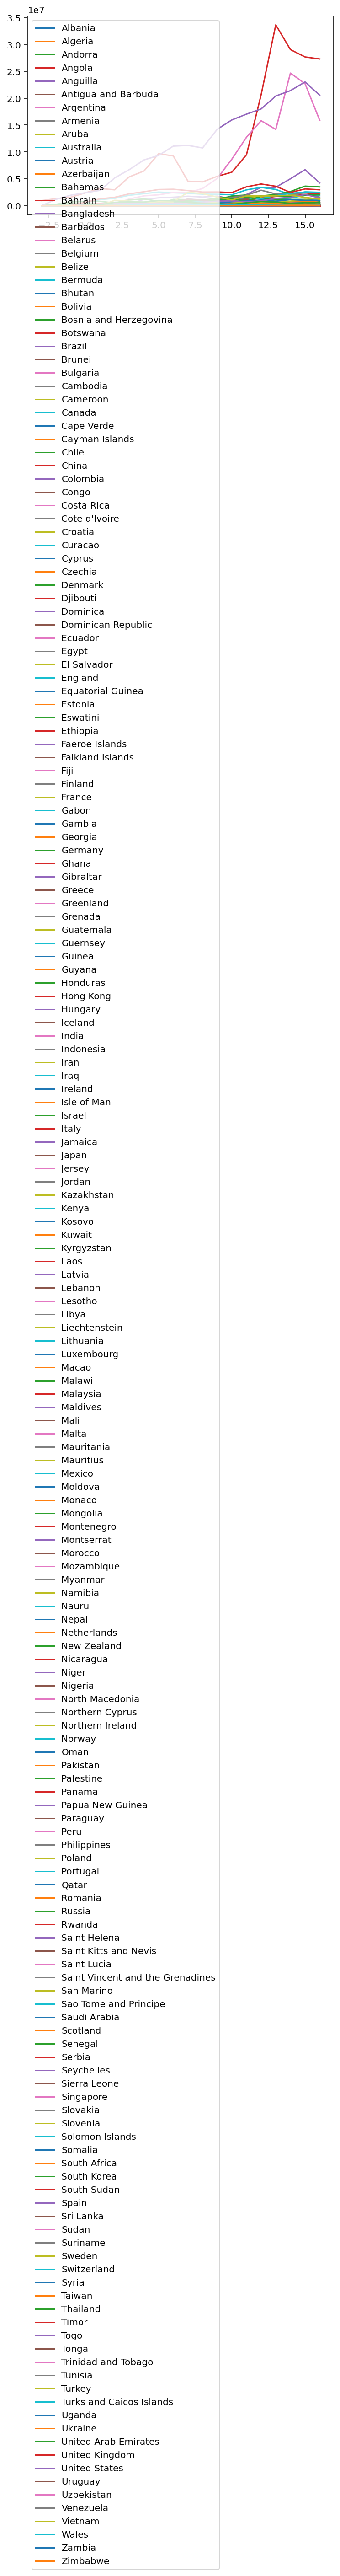

In [23]:
from matplotlib import pyplot as plt

for i in range(1,len(df4.columns)):
  plt.plot(df4.index, df4.iloc[:,i])
plt.legend(df4.columns[1:])

## Temporal analysis

In [24]:
# First, we need to download an auxiliary Python file for STAN
!wget http://mlsm.man.dtu.dk/mbml/pystan_utils.py

--2021-05-07 07:51:37--  http://mlsm.man.dtu.dk/mbml/pystan_utils.py
Resolving mlsm.man.dtu.dk (mlsm.man.dtu.dk)... 192.38.87.226
Connecting to mlsm.man.dtu.dk (mlsm.man.dtu.dk)|192.38.87.226|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2661 (2.6K) [text/x-python]
Saving to: ‘pystan_utils.py’

pystan_utils.py     100%[===================>]   2.60K  --.-KB/s    in 0s      

2021-05-07 07:51:38 (353 MB/s) - ‘pystan_utils.py’ saved [2661/2661]



In [25]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
import pystan
import pystan_utils

# fix random generator seed (for reproducibility of results)
np.random.seed(42)

In [26]:
# convert data to a matrix
y = df4.to_numpy()
N, D = y.shape
y = y.astype(int)
print("N=%d, D=%d" % (N,D))
print(y)

N=19, D=193
[[     0      0      0 ...      0      0      0]
 [     0      0      0 ...      0      0      0]
 [     0      0      0 ...      0      0      0]
 ...
 [ 28143  87103      0 ... 128569      0  81777]
 [ 53857  63654      0 ... 189417    994  89760]
 [ 32000  65267      0 ... 142414   9456  59619]]


In [27]:
ix_train = range(17) # 17 weeks for training
ix_test = range(17, 19) # 2 weeks for testing
N_train = len(ix_train)
N_test = len(ix_test)
print("N_train:", N_train)
print("N_test:", N_test)
y_train = y[ix_train,:]
y_test = y[ix_test,:]

N_train: 17
N_test: 2


In [34]:
# define Stan model
model_definition = """
data {
    int T;            // length of the time-series
    int T_forecast;   // num. steps ahead to predict
    int K;  // num. countries
    real y[T,K];                 // time-series data
}

parameters {
    vector[K] b;            // state transition coefficients
    vector<lower=0.001>[K] W;            // state transition coefficients 
}

model {
  for(k in 1:K) {
    b[k] ~ normal(0,10);             // prior on the auto-regressive coefficients
   	W[k] ~ cauchy(0,10);             // prior on the auto-regressive coefficients
  }
    
    for(k in 1:K) {
      for(t in 2:(T)) {
        y[t,k] ~ normal(b[k]' * y[t-1,k], W[k]); // likelihood
      }
    }
}
generated quantities {
    real y_hat[T_forecast,K];          // vector to store predictions

    for(k in 1:K) {
        y_hat[1,k] <- normal_rng(y[T,k], W[k]);  // predictions
  }

  for(k in 1:K) {
      for (t in 2:T_forecast) {
        y_hat[t,k] <- normal_rng(y_hat[t-1,k], W[k]);  // predictions
      }
  }
}
"""


In [35]:
T_forecast = len(ix_test)
T = len(y_train)
K = D

In [58]:
# prepare data for Stan model
data = {'T': T, 'T_forecast': T_forecast, 'K': 2 ,'y': y_train[:, :2]}

In [59]:
print(N, T_forecast,D)

19 2 193


In [60]:
%%time
# create Stan model object (compile Stan model)
sm = pystan.StanModel(model_code=model_definition)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_63e58b949b5036ee714368d1bd218b8b NOW.


CPU times: user 1.73 s, sys: 167 ms, total: 1.89 s
Wall time: 1min 4s


In [61]:
fit = sm.sampling(data=data, iter=500, chains=4, algorithm="NUTS", seed=42, verbose=True)
print(fit)

Inference for Stan model: anon_model_63e58b949b5036ee714368d1bd218b8b.
4 chains, each with iter=500; warmup=250; thin=1; 
post-warmup draws per chain=250, total post-warmup draws=1000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
b[1]         1.15  2.6e-3   0.07   1.02    1.1   1.15    1.2   1.32    766    1.0
b[2]         1.13  6.0e-3   0.19   0.78   1.01   1.13   1.26   1.52    958    1.0
W[1]       3189.4   23.64 652.81 2254.8 2744.6 3067.8 3513.7 4744.1    762    1.0
W[2]        1.8e4  117.59 3300.0  1.3e4  1.6e4  1.8e4  2.0e4  2.6e4    788    1.0
y_hat[1,1]  2.8e4   106.7 3308.1  2.1e4  2.6e4  2.8e4  3.0e4  3.5e4    961    1.0
y_hat[2,1]  2.8e4  161.97 4751.9  1.8e4  2.5e4  2.8e4  3.1e4  3.7e4    861    1.0
y_hat[1,2]  8.8e4  588.14  1.9e4  5.1e4  7.6e4  9.0e4 10.0e4  1.2e5   1016    1.0
y_hat[2,2]  8.8e4  819.83  2.5e4  3.6e4  7.1e4  8.8e4  1.0e5  1.3e5    953    1.0
lp__       -311.1    0.07    1.5 -314.8 -311.8 -310.8 -310.0 -309.3    409  

In [62]:
samples = fit.extract(permuted=True)  # return a dictionary of arrays

In [76]:
y_hat= samples["y_hat"]
print('y_hat.shape:', y_hat.shape)
print('y_test.shape:', y_test[:,:2].shape)
y_test_mean=y_test[:,:2]

y_hat.shape: (1000, 2, 2)
y_test.shape: (2, 2)


In [77]:
y_hat_mean= np.mean(y_hat, axis=0)
y_hat_mean.shape

(2, 2)

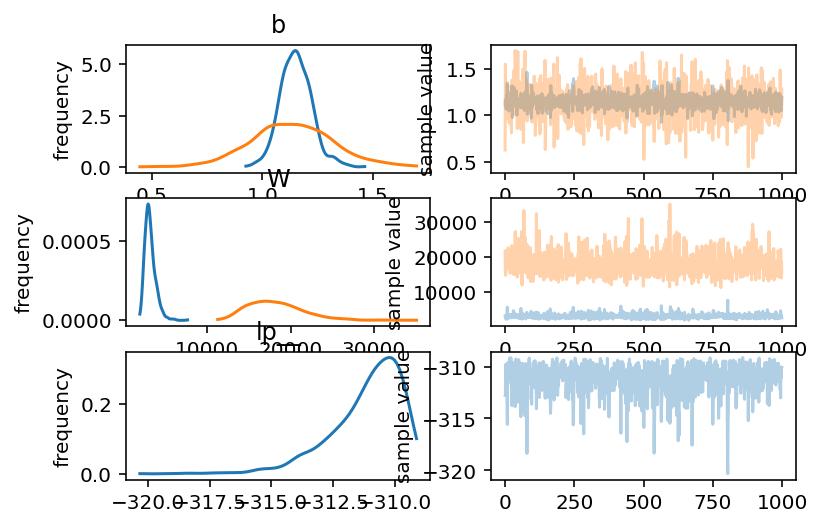

In [66]:
fit.plot(["b","W","lp__"])
plt.show()

In [81]:
for t in range(2):
  print("predictions time:",t, y_hat_mean[t,:])
  print("true values:", y_test_mean[t,:])
  
  # evaluate prediction accuracy
  print("Accuracy:", 1.0*np.abs(np.sum(y_hat_mean[t,:] - y_test_mean[t,:])) / N)

predictions time: 0 [27935.77115053 88458.6021595 ]
true values: [53857 63654]
Accuracy: 58.76982578774914
predictions time: 1 [27879.51714824 87512.79427065]
true values: [32000 65267]
Accuracy: 953.963758889178


In [82]:
def compute_error(trues, predicted):
    corr = np.corrcoef(predicted, trues)[0,1]
    mae = np.mean(np.abs(predicted - trues))
    rae = np.sum(np.abs(predicted - trues)) / np.sum(np.abs(trues - np.mean(trues)))
    rmse = np.sqrt(np.mean((predicted - trues)**2))
    r2 = max(0, 1 - np.sum((trues-predicted)**2) / np.sum((trues - np.mean(trues))**2))
    return corr, mae, rae, rmse, r2

In [83]:
corr, mae, rae, rmse, r2 = compute_error(y_test_mean, y_hat_mean)
print("CorrCoef: %.3f\nMAE: %.5f\nRMSE: %.5f\nR2: %.3f" % (corr, mae, rmse, r2))

CorrCoef: 1.000
MAE: 19273.02703
RMSE: 21207.49947
R2: 0.000


In [85]:
y_hat = samples["y_hat"].mean(axis=0)
y_std = samples["y_hat"].std(axis=0)

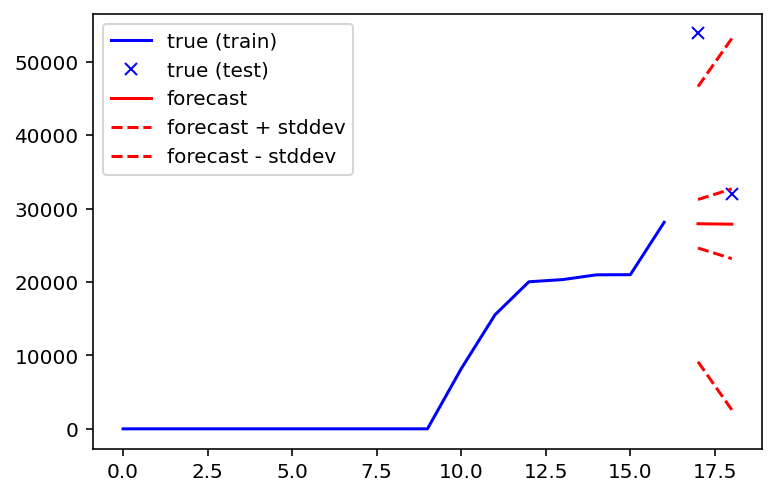

In [90]:
plt.plot(ix_train, y_train[:, 0], "b-")
plt.plot(ix_test, y_test_mean[:,0], "bx")
plt.plot(ix_test, y_hat[:,0], "r-")
plt.plot(ix_test, y_hat[:,0] + y_std, "r--")
plt.plot(ix_test, y_hat[:,0] - y_std, "r--")
plt.legend(["true (train)","true (test)","forecast","forecast + stddev","forecast - stddev"])